# Emotion Recognition using CNN

In [9]:
import tensorflow as tf
import os
import cv2
from tensorflow import keras
from keras import layers
from keras.models import load_model
import numpy as np


In [11]:
# consts

# Please provide you own path
path = "../../Datasets/fer2013/"

train_folder = path + "train/"
valid_folder = path + "test/"

emotion_labels = ['Happy', 'Surprise', 'Sad', 'Neutral', 'Angry', 'Disgust', 'Fear']
model = load_model("../../app/models/cnn_emotion.h5")

In [12]:
# Defining emotions
class Emotions:
    def __init__(self):
        self.emotion_labels = ['Happy', 'Surprise', 'Sad', 'Neutral', 'Angry', 'Disgust', 'Fear']

    def get_emotion_label(self, index):
        return self.emotion_labels[index]

In [13]:
def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (48, 48))
    normalized = resized / 255.0
    preprocessed = normalized.reshape(1, 48, 48, 1)
    return preprocessed

In [14]:
def preprocess_images(images):
    preprocessed_images = []
    for image in images:
        # Resize the image to a desired size
        resized_image = cv2.resize(image, (48, 48))
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        # Normalize the pixel values to the range [0, 1]
        normalized_image = gray_image / 255.0
        preprocessed_images.append(normalized_image)
    return preprocessed_images

In [15]:
def predict_emotion(image):
    # Preprocess the image
    preprocessed_image = preprocess_image(image)
    # Perform the prediction
    predictions = model.predict(preprocessed_image)
    # Get the predicted emotion label
    predicted_label_index = np.argmax(predictions[0])
    predicted_label = emotion_labels[predicted_label_index]
    return predicted_label


In [16]:

def load_and_preprocess_images_from_folder(folder):
    images = []
    labels = []
    for emotion_idx, emotion in enumerate(emotion_labels):
        folder_path = os.path.join(folder, emotion)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(emotion_idx)
    # Preprocess the images
    preprocessed_images = preprocess_images(images)
    return preprocessed_images, labels

In [17]:
# Load images from the train folder
x_train, y_train = load_and_preprocess_images_from_folder(train_folder)

# Load images from the validation folder
x_valid, y_valid = load_and_preprocess_images_from_folder(valid_folder)

# Convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_valid = np.array(x_valid)
y_valid = np.array(y_valid)

# Reshape the input arrays to match the expected input shape of the model
x_train = x_train.reshape(-1, 48, 48, 1)
x_valid = x_valid.reshape(-1, 48, 48, 1)

# Convert the labels to one-hot encoded vectors
num_classes = len(emotion_labels)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [17]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.25),
    layers.Flatten(),
    
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(7, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 21, 21, 64)       256       
 hNormalization)                                                 
                                                      

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=64, batch_size=64)

Epoch 1/64
449/449 [==============================] - 10s 13ms/step - loss: 1.8185 - accuracy: 0.2570 - val_loss: 1.7592 - val_accuracy: 0.2519
Epoch 2/64
449/449 [==============================] - 5s 12ms/step - loss: 1.5736 - accuracy: 0.3796 - val_loss: 1.5007 - val_accuracy: 0.4533
Epoch 3/64
449/449 [==============================] - 5s 12ms/step - loss: 1.4290 - accuracy: 0.4517 - val_loss: 1.4695 - val_accuracy: 0.4395
Epoch 4/64
449/449 [==============================] - 5s 12ms/step - loss: 1.3494 - accuracy: 0.4889 - val_loss: 1.3406 - val_accuracy: 0.4799
Epoch 5/64
449/449 [==============================] - 6s 12ms/step - loss: 1.2814 - accuracy: 0.5128 - val_loss: 1.3500 - val_accuracy: 0.4946
Epoch 6/64
449/449 [==============================] - 6s 12ms/step - loss: 1.2359 - accuracy: 0.5328 - val_loss: 1.2638 - val_accuracy: 0.5212
Epoch 7/64
449/449 [==============================] - 6s 12ms/step - loss: 1.1852 - accuracy: 0.5535 - val_loss: 1.2855 - val_accuracy: 0.501

Epoch 58/64
449/449 [==============================] - 6s 12ms/step - loss: 0.2196 - accuracy: 0.9305 - val_loss: 2.2861 - val_accuracy: 0.5776
Epoch 59/64
449/449 [==============================] - 5s 12ms/step - loss: 0.2101 - accuracy: 0.9349 - val_loss: 2.4863 - val_accuracy: 0.5837
Epoch 60/64
449/449 [==============================] - 6s 12ms/step - loss: 0.2016 - accuracy: 0.9367 - val_loss: 2.3760 - val_accuracy: 0.5615
Epoch 61/64
449/449 [==============================] - 5s 12ms/step - loss: 0.2044 - accuracy: 0.9365 - val_loss: 2.5575 - val_accuracy: 0.5760
Epoch 62/64
449/449 [==============================] - 5s 12ms/step - loss: 0.2167 - accuracy: 0.9339 - val_loss: 2.3788 - val_accuracy: 0.5870
Epoch 63/64
449/449 [==============================] - 5s 12ms/step - loss: 0.2007 - accuracy: 0.9378 - val_loss: 2.8042 - val_accuracy: 0.5651
Epoch 64/64
449/449 [==============================] - 5s 12ms/step - loss: 0.2042 - accuracy: 0.9382 - val_loss: 2.3998 - val_accuracy:

In [19]:
model.save("../../app/models/cnn_emotion2.h5")

In [20]:
model = load_model("../../app/models/cnn_emotion.h5")

224/224 [==============================] - 4s 17ms/step


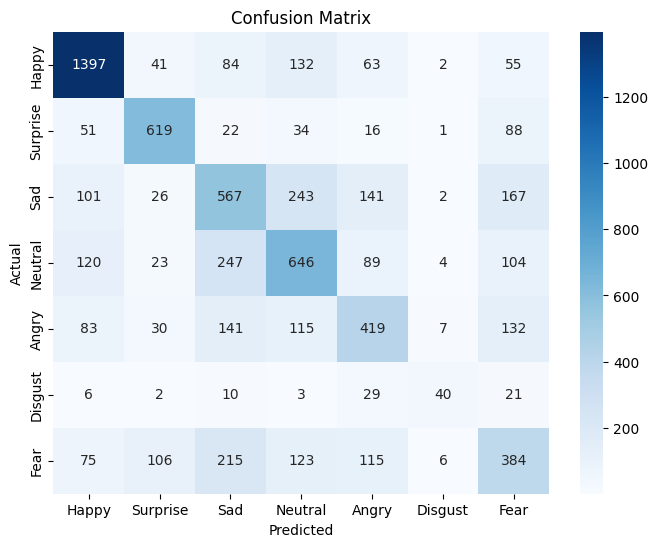

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for the validation set
y_pred = model.predict(x_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to single labels
y_valid_single = np.argmax(y_valid, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_valid_single, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


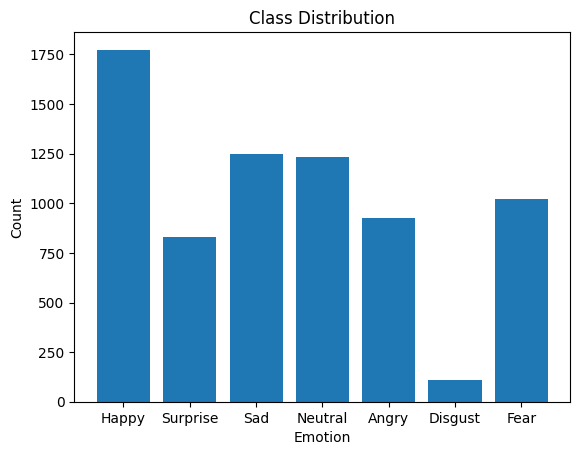

In [22]:
# Count the number of samples in each class
class_counts = np.bincount(y_valid_single)

# Plot bar plot
plt.bar(emotion_labels, class_counts)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()
